In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1.
First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

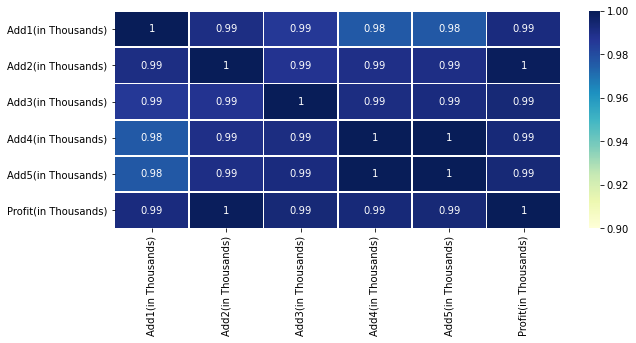

In [8]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=.9,vmax=1,annot=True,linewidths=0.6,cmap='YlGnBu')

# 
There is relationship between the amount spent for advertising through five different companies and profit generated. they are highly correlated

# 2.
Build a regression model to predict the profit from the given data and comment your findings on it.

In [9]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [43]:
y=df['Profit(in Thousands)']
x=df.drop(['Date','Profit(in Thousands)'],axis=1)

In [44]:
x.shape

(205, 5)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [46]:
from sklearn import linear_model

In [47]:
lr=linear_model.LinearRegression()

In [48]:
model= lr.fit(x_train,y_train)

In [49]:
predictions=model.predict(x_test)

In [50]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [51]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
from sklearn.metrics import r2_score

In [54]:
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 8.40522235336141e-25


In [55]:
print('R squared value:',r2_score(y_test,predictions))

R squared value: 1.0


In [56]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [57]:
y1=df['Profit(in Thousands)']
x1=df.drop(['Date','Add1(in Thousands)','Profit(in Thousands)'],axis=1)
x1.shape

(205, 4)

In [58]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.3)

In [61]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model1= lr.fit(x1_train,y1_train)
predictions1=model1.predict(x1_test)
print(y1_test)
print(predictions1)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64
[4150.48356416 4448.76787477 5128.31336327 4905.52840414 5003.02470361
 4624.46562818 5383.24164182 5328.08538431 5172.35821063 5958.3419281
 5780.41495525 4997.66901202 5075.72615756 5782.164598   4933.05125725
 5066.49893124 4190.21699137 5033.53183412 5010.79299688 5132.07166155
 5145.82899519 5424.66726112 4570.66195104 4595.92865421 4437.43080666
 4176.08369576 5612.85806106 5665.56091076 4649.64586899 5719.9462512
 5003.82873389 5181.84751585 5016.91337793 5542.87239834 5014.11752171
 5031.07117256 5107.03967714 4758.38882218 4607.38021028 4927.22749668
 5253.80166184 5039.59174445 5490.1203931  5021.87185676 4645.69882087
 4487.29832117 4432.96761259 5303.9448506  5427.08704226 4479.3218944
 4190.50291916 6061.58407208 4889.13964666 5802.25123927 4706.

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is',mean_squared_error(y_test,predictions))
print('R squared value:',r2_score(y_test,predictions))

MSE is 8.40522235336141e-25
R squared value: 1.0


#
the R squared value is close to 1, which means the model fits well to the data.
the MSE is around 4, which means the regression line is close to the set of points
from these we getan idea that the data taken is highy related

# 3.
Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [64]:
make_prediction=[[290,312,309,298,320]]
print('predicted profit is:',(model.predict(make_prediction).item()))

predicted profit is: 5820.06


# 
the predicted profit for the model is 5820.06